# Task 10 : Benchmark Top ML Algorithms

This task tests your ability to use different ML algorithms when solving a specific problem.


### Dataset
Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

Train: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv

Test: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv

## Task Requirements
### You can have the following Classification models built using different ML algorithms
- Decision Tree
- KNN
- Logistic Regression
- SVM
- Random Forest
- Any other algorithm of your choice

### Use GridSearchCV for finding the best model with the best hyperparameters

- ### Build models
- ### Create Parameter Grid
- ### Run GridSearchCV
- ### Choose the best model with the best hyperparameter
- ### Give the best accuracy
- ### Also, benchmark the best accuracy that you could get for every classification algorithm asked above

#### Your final output will be something like this:
- Best algorithm accuracy
- Best hyperparameter accuracy for every algorithm

**Table 1 (Algorithm wise best model with best hyperparameter)**

Algorithm   |     Accuracy   |   Hyperparameters
- DT
- KNN
- LR
- SVM
- RF
- anyother

**Table 2 (Best overall)**

Algorithm    |   Accuracy    |   Hyperparameters



### Submission
- Submit Notebook containing all saved ran code with outputs
- Document with the above two tables

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier



In [7]:
train_url = "/Users/simranmodi/Downloads/loan_train.csv"
test_url = "/Users/simranmodi/Downloads/loan_test.csv"


In [8]:
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
# Missing values in the dataset
for i in range(len(train_df.columns)):
    missing_data = train_df[train_df.columns[i]].isna().sum()
    perc = missing_data / len(train_df) * 100
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

Feature 1 >> Missing entries: 0  |  Percentage: 0.0
Feature 2 >> Missing entries: 13  |  Percentage: 2.12
Feature 3 >> Missing entries: 3  |  Percentage: 0.49
Feature 4 >> Missing entries: 15  |  Percentage: 2.44
Feature 5 >> Missing entries: 0  |  Percentage: 0.0
Feature 6 >> Missing entries: 32  |  Percentage: 5.21
Feature 7 >> Missing entries: 0  |  Percentage: 0.0
Feature 8 >> Missing entries: 0  |  Percentage: 0.0
Feature 9 >> Missing entries: 22  |  Percentage: 3.58
Feature 10 >> Missing entries: 14  |  Percentage: 2.28
Feature 11 >> Missing entries: 50  |  Percentage: 8.14
Feature 12 >> Missing entries: 0  |  Percentage: 0.0
Feature 13 >> Missing entries: 0  |  Percentage: 0.0


<Axes: >

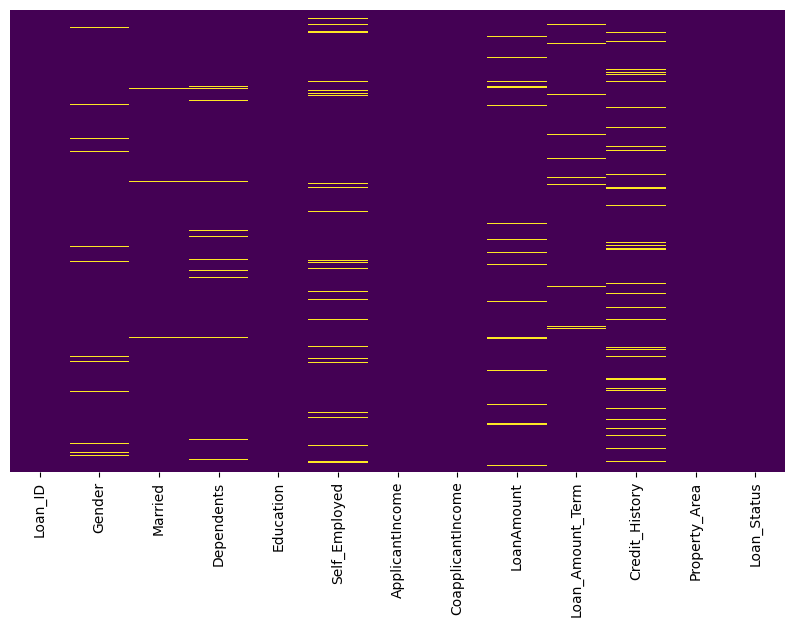

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [11]:
combined_data = pd.concat([train_df, test_df], axis=0)
combined_data.fillna(method="ffill", inplace=True)

In [12]:
label_encoder = LabelEncoder()
categorical_columns = ["Gender", "Married", "Education", "Self_Employed", "Property_Area", "Loan_Status"]
for column in categorical_columns:
    combined_data[column] = label_encoder.fit_transform(combined_data[column])


In [13]:
train_df = combined_data[:len(train_df)]
test_df = combined_data[len(train_df):]

In [14]:
X = train_df.drop(columns=["Loan_Status"])
y = train_df["Loan_Status"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=50)

In [16]:
X_train = X_train.drop(columns=["Loan_ID"])
X_test = X_test.drop(columns=["Loan_ID"])

In [17]:
X_train['Dependents'] = X_train['Dependents'].str.rstrip('+').astype(int)
X_test['Dependents'] = X_test['Dependents'].str.rstrip('+').astype(int)

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
numeric_columns = ["LoanAmount"]

In [20]:
imputer = SimpleImputer(strategy="mean")

In [21]:
X_train[numeric_columns] = imputer.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = imputer.transform(X_test[numeric_columns])

In [22]:
cat_col= ["Gender", "Married", "Self_Employed", "Credit_History"]

In [23]:
for column in cat_col:
    most_frequent_value = X_train[column].mode()[0]
    X_train[column].fillna(most_frequent_value, inplace=True)
    X_test[column].fillna(most_frequent_value, inplace=True)

<Axes: >

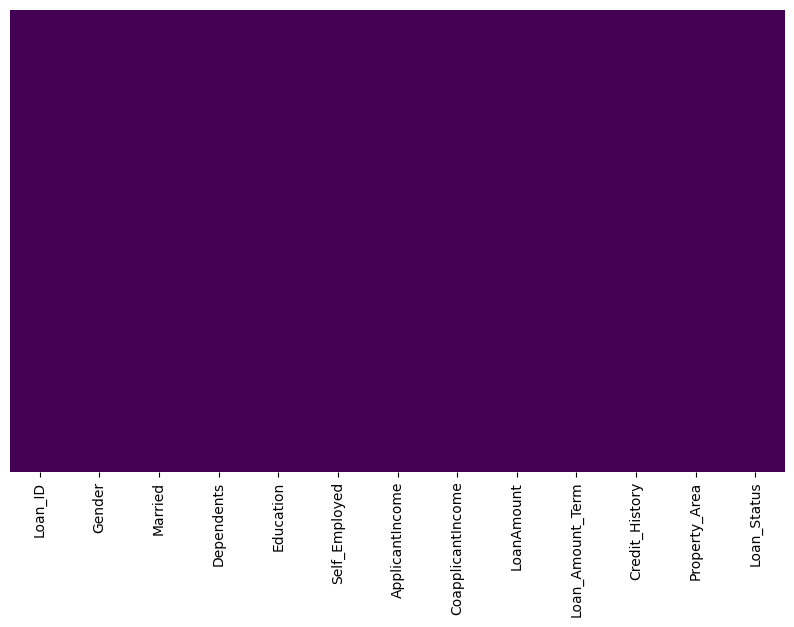

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [29]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

para = {
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "p": [1, 2]
    },
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "penalty": ["l1", "l2"]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "poly", "rbf", "sigmoid"]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }
}

In [30]:
best_models = {}
best_hyperparameters = {}
best_accuracies = {}

for model_name, model in models.items():
    param_grid = para[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_models[model_name] = grid_search.best_estimator_
    best_hyperparameters[model_name] = grid_search.best_params_
    
    y_pred = grid_search.best_estimator_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    best_accuracies[model_name] = accuracy

best_algorithm = max(best_accuracies, key=best_accuracies.get)
best_accuracy = best_accuracies[best_algorithm]
best_hyperparameter = best_hyperparameters[best_algorithm]


/Users/simranmodi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/simranmodi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/simranmodi/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [31]:
from tabulate import tabulate

model_results = []
for model_name in models.keys():
    result = {
        "Algorithm": model_name,
        "Accuracy": best_accuracies[model_name],
        "Hyperparameters": best_hyperparameters[model_name]
    }
    model_results.append(result)

results_df = pd.DataFrame(model_results)
print("Table 1 (Algorithm wise best model with best hyperparameter):")
table1 = tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False)
print(table1)

Table 1 (Algorithm wise best model with best hyperparameter):
╒═════════════════════╤════════════╤═══════════════════════════════════════════════════════════════════════════════════════════╕
│ Algorithm           │   Accuracy │ Hyperparameters                                                                           │
╞═════════════════════╪════════════╪═══════════════════════════════════════════════════════════════════════════════════════════╡
│ Decision Tree       │   0.707317 │ {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10} │
├─────────────────────┼────────────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│ KNN                 │   0.615176 │ {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}                                          │
├─────────────────────┼────────────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│ Logistic Regression │   0.813008 

In [32]:
best_overall_model = results_df.iloc[results_df["Accuracy"].idxmax()]
print("\n Table 2 (Best overall):")
table2 = tabulate([best_overall_model], headers='keys', tablefmt='fancy_grid', showindex=False)
print(table2)


 Table 2 (Best overall):
╒═════════════════════╤════════════╤═══════════════════════════╕
│ Algorithm           │   Accuracy │ Hyperparameters           │
╞═════════════════════╪════════════╪═══════════════════════════╡
│ Logistic Regression │   0.813008 │ {'C': 1, 'penalty': 'l2'} │
╘═════════════════════╧════════════╧═══════════════════════════╛
